In [3]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Descripción del corpus

Este conjunto de datos está orientado a la detección de productos defectuosos en un entorno de manufactura o producción industrial. Cada fila representa un lote de producción o una observación individual. Las variables incluidas son:

- **ProductionVolume**: Volumen de producción del lote.
- **ProductionCost**: Costo total asociado al lote de producción.
- **SupplierQuality**: Índice de calidad del proveedor (0–100).
- **DeliveryDelay**: Retraso en la entrega (en días).
- **DefectRate**: Porcentaje de unidades defectuosas dentro del lote.
- **QualityScore**: Puntuación de calidad global (0–100).
- **MaintenanceHours**: Horas dedicadas a mantenimiento preventivo o correctivo.
- **DowntimePercentage**: Porcentaje de tiempo de inactividad en la línea de producción.
- **InventoryTurnover**: Tasa de rotación del inventario.
- **StockoutRate**: Tasa de faltantes en el inventario (proporción de veces que no se cumplió con la demanda).
- **WorkerProductivity**: Índice de productividad de los trabajadores.
- **SafetyIncidents**: Número de incidentes de seguridad registrados.
- **EnergyConsumption**: Consumo energético total del proceso (en kWh).
- **EnergyEfficiency**: Eficiencia energética del proceso (índice entre 0 y 1).
- **AdditiveProcessTime**: Tiempo empleado en procesos aditivos (por ejemplo, impresión 3D).
- **AdditiveMaterialCost**: Costo de los materiales usados en procesos aditivos.
- **DefectStatus**: **Variable objetivo** (etiqueta binaria):
  - `0`: Lote sin defectos.
  - `1`: Lote con defectos.


# Ejercicio 1


1. Carga el archivo `corpus_dt2.csv` con `pandas`.
2. Separa la variable objetivo (`DefectStatus`) del resto de las variables predictoras.
3. Divide el dataset en conjuntos de entrenamiento y prueba usando `train_test_split` con 80% para entrenamiento y 20% para prueba.
4. Visualiza las primeras filas para familiarizarte con el contenido.


In [4]:
df = pd.read_csv("corpus_dt.csv")

x = df.drop('DefectStatus', axis = 1)
y = df ['DefectStatus']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(df.head(5))

   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322           85.042379                0   
1       

# Ejercicio 2

1. Entrena un clasificador de árbol de decisión (`DecisionTreeClassifier`) usando los siguientes parámetros:

  - `criterion='gini'`: criterio de impureza.
  - `max_depth=5`: profundidad máxima del árbol.
  - `min_samples_split=10`: mínimo de muestras para dividir un nodo.
  - `min_samples_leaf=10`: mínimo de muestras por hoja.

2. Realiza predicciones sobre el conjunto de prueba.
3. Genera un reporte de clasificación (`classification_report`) con las métricas de desempeño.
4. Muestra la importancia de cada variable (`feature_importances_`).

In [5]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier (criterion ='entropy', max_depth =5, min_samples_split=10, min_samples_leaf=10)

arbol.fit (x_train, y_train)

y_pred = arbol.predict (x_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

importancia = pd.DataFrame({'Variable': x_train.columns,'Importancia': arbol.feature_importances_}).sort_values(by='Importancia', ascending=False)

print("\n Importancia de las variables:")
print(importancia)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       102
           1       0.96      0.98      0.97       546

    accuracy                           0.95       648
   macro avg       0.93      0.88      0.90       648
weighted avg       0.95      0.95      0.95       648


 Importancia de las variables:
                Variable  Importancia
4             DefectRate     0.254097
5           QualityScore     0.234344
0       ProductionVolume     0.226416
6       MaintenanceHours     0.214371
15  AdditiveMaterialCost     0.021499
2        SupplierQuality     0.017143
14   AdditiveProcessTime     0.008624
8      InventoryTurnover     0.008608
12     EnergyConsumption     0.005721
13      EnergyEfficiency     0.005384
9           StockoutRate     0.003793
1         ProductionCost     0.000000
7     DowntimePercentage     0.000000
3          DeliveryDelay     0.000000
11       SafetyIncidents     0.000000
10    W

Visualiza el árbol:

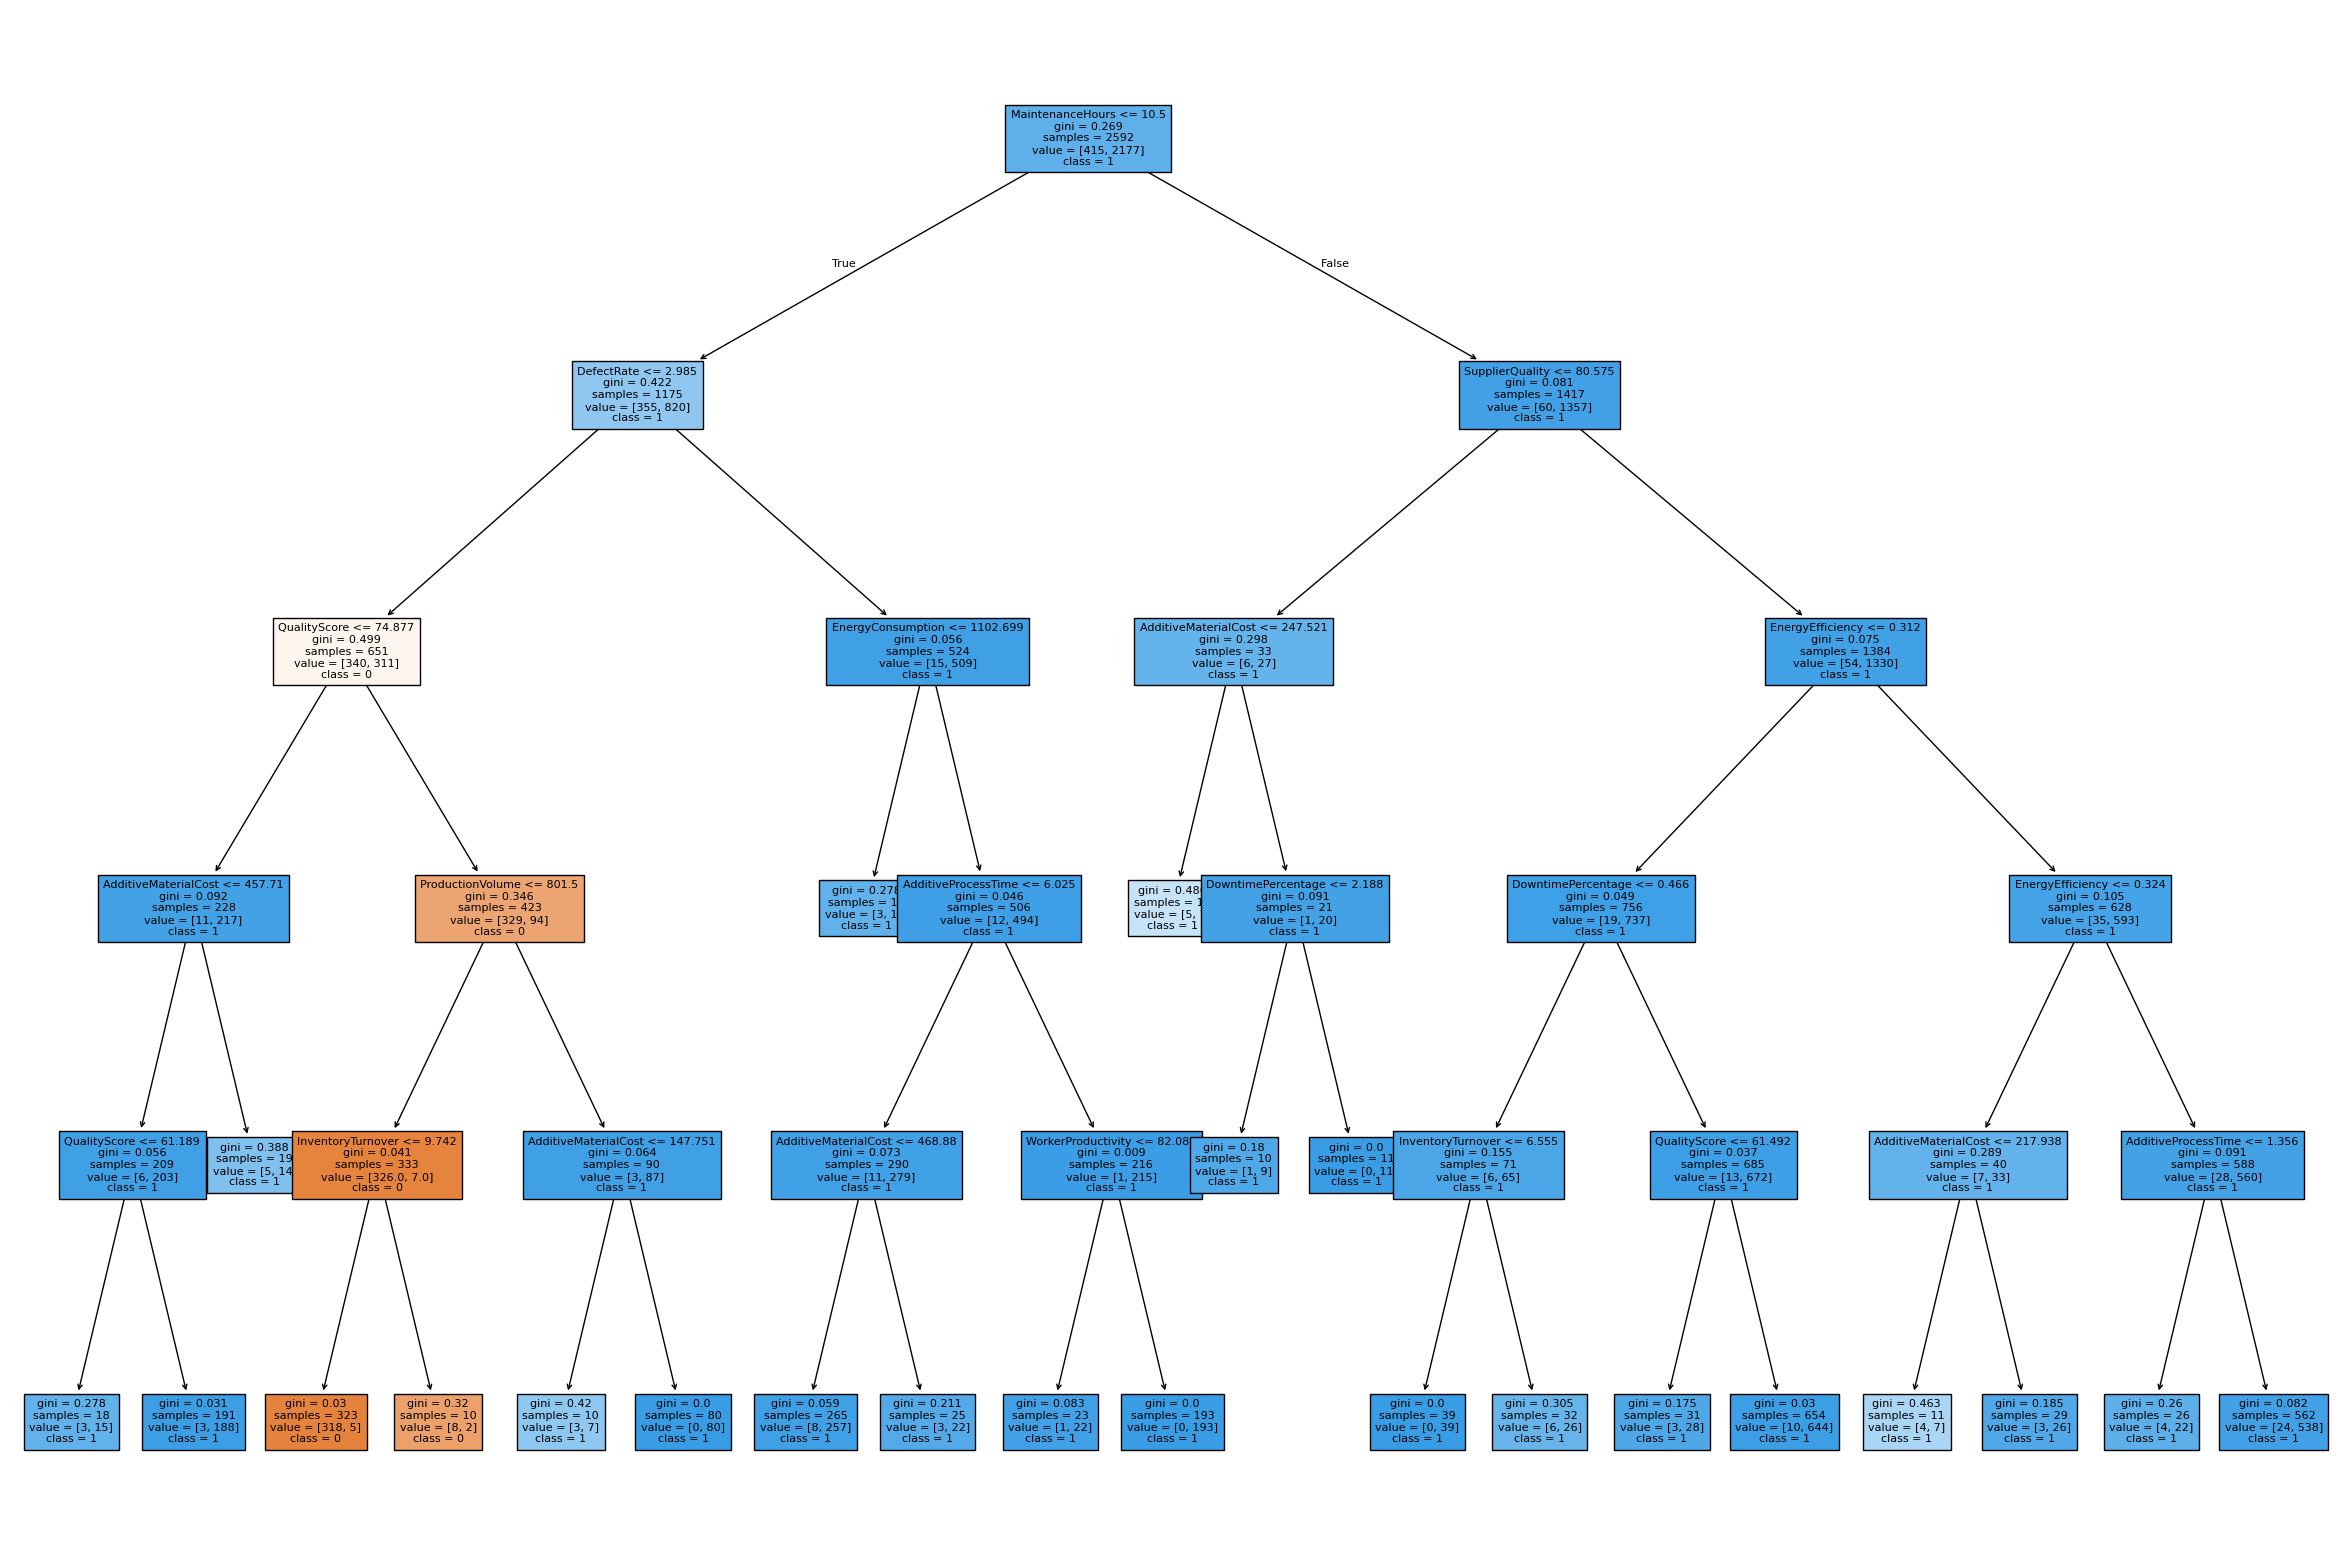

In [16]:
plt.figure(figsize=(30,20))
plot_tree(arbol, feature_names=x.columns, class_names=[str(cls) for cls in arbol.classes_], filled=True,fontsize=8)
plt.show()

# Ejercicio 3

- Juega con diferentes configuraciones del árbol puedes probar a:
  - Cambiar el criterio de impureza de `'gini'` a `'entropy'`.
  - Modificar los **hiperparámetros** del árbol para observar su impacto en el rendimiento.
- Entrena nuevamente el modelo con estos nuevos parámetros.
- Realiza las predicciones sobre el conjunto de prueba.
- Genera un nuevo `classification_report`.
- Compara las métricas con las obtenidas en el ejercicio anterior.

# Ejercicio 4

Aplica un clasificador de tipo `BaggingClassifier` utilizando `DecisionTreeClassifier` como estimador base.

- Usa los siguientes parámetros:
   - `n_estimators=100`: número de modelos base.
   - `bootstrap=True`: muestreo con reemplazo.
   - `random_state=42`: reproducibilidad.

- Entrena el modelo con los datos de entrenamiento.

- Evalúa el rendimiento en el conjunto de prueba usando `classification_report`.

- Compara los resultados con los del árbol individual del Ejercicio 2.


In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier ( estimator = DecisionTreeClassifier () ,
 n_estimators =100 ,
 bootstrap =True ,
 random_state =42)

bagging.fit (x_train, y_train)
y_pred = bagging.predict(x_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       102
           1       0.96      0.98      0.97       546

    accuracy                           0.95       648
   macro avg       0.93      0.87      0.90       648
weighted avg       0.95      0.95      0.95       648



# Ejercicio 5

- Aplica un modelo de tipo `RandomForestClassifier` para clasificar los datos.

- Usa los siguientes hiperparámetros:
   - `n_estimators=100`: número de árboles.
   - `max_features='sqrt'`: cantidad de variables consideradas en cada división.
   - `max_depth=5`: profundidad máxima del árbol.
   - `random_state=42`: para reproducibilidad.

- Entrena el modelo y evalúa su rendimiento en el conjunto de prueba.

- Genera el `classification_report` y analiza las métricas obtenidas.

- ¿Mejora el rendimiento con respecto al Bagging y al árbol individual?


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (n_estimators=100, max_features='sqrt', max_depth=5, random_state=42)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.95       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.95      0.95       648



# Ejercicio 6

- Utiliza un modelo `GradientBoostingClassifier` para mejorar el rendimiento mediante boosting.

- Configura los siguientes parámetros:
   - `n_estimators=100`: número de etapas de boosting.
   - `learning_rate=0.1`: tasa de aprendizaje.
   - `max_depth=5`: profundidad máxima de cada árbol.
   - `random_state=42`: para reproducibilidad.

- Entrena el modelo con el conjunto de entrenamiento.

- Evalúa el modelo con `classification_report` usando el conjunto de prueba.

- Compara los resultados con Bagging y Random Forest.


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier (n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       102
           1       0.96      0.98      0.97       546

    accuracy                           0.95       648
   macro avg       0.93      0.88      0.90       648
weighted avg       0.95      0.95      0.95       648

